In [1]:
### Struktura danych

import numpy as np

filename = f"ToyMC/output_0/toymc_25gev_0deg.dat"
events_to_show = 3  

print(f"Podgląd pliku: {filename}\n")

try:
    with open(filename, 'rb') as infile:
        for i in range(events_to_show):
            print(f"=== Zdarzenie numer {i+1} ===")
            
            header = np.fromfile(infile, dtype=np.int64, count=4)
            if len(header) < 4: break
            
            shift = np.fromfile(infile, dtype=np.float64, count=4)
            
            Nlist = header[3]  
            
            idlist = np.fromfile(infile, dtype=np.int64, count=Nlist)
            
            elist = np.fromfile(infile, dtype=np.float64, count=Nlist)
            
            print(f"  [Header] ID: {header[0]}, N_dep: {header[1]}, ?: {header[2]}, N_list (piksele): {Nlist}")
            print(f"  [Prawda] X: {shift[0]:.4f} mm, Y: {shift[1]:.4f} mm, Kąt X: {shift[2]:.4f} deg, Kąt Y: {shift[3]:.4f} deg")
            
            print(f"  [Dane]   Pierwsze 5 zapalonych pikseli:")
            for j in range(min(5, Nlist)):
                layer = idlist[j] // 100000
                idx_x = (idlist[j] % 100000) // 100
                idx_y = idlist[j] % 100
                print(f"           - Piksel {idlist[j]} (L:{layer}, X:{idx_x}, Y:{idx_y}) -> {elist[j]:.4f} MIP")
            print("\n")

except FileNotFoundError:
    print("Nie znaleziono pliku.")

Podgląd pliku: ToyMC/output_0/toymc_25gev_0deg.dat

=== Zdarzenie numer 1 ===
  [Header] ID: 0, N_dep: 930, ?: 0, N_list (piksele): 64
  [Prawda] X: 13.3835 mm, Y: -2.5447 mm, Kąt X: 0.0000 deg, Kąt Y: 0.0000 deg
  [Dane]   Pierwsze 5 zapalonych pikseli:
           - Piksel 4707 (L:0, X:47, Y:7) -> 2.6919 MIP
           - Piksel 5007 (L:0, X:50, Y:7) -> 7.8792 MIP
           - Piksel 104907 (L:1, X:49, Y:7) -> 2.2026 MIP
           - Piksel 105007 (L:1, X:50, Y:7) -> 12.2305 MIP
           - Piksel 205001 (L:2, X:50, Y:1) -> 0.5178 MIP


=== Zdarzenie numer 2 ===
  [Header] ID: 1, N_dep: 1005, ?: 0, N_list (piksele): 62
  [Prawda] X: 1.2939 mm, Y: 5.9204 mm, Kąt X: 0.0000 deg, Kąt Y: 0.0000 deg
  [Dane]   Pierwsze 5 zapalonych pikseli:
           - Piksel 4808 (L:0, X:48, Y:8) -> 0.9716 MIP
           - Piksel 4809 (L:0, X:48, Y:9) -> 9.0527 MIP
           - Piksel 104707 (L:1, X:47, Y:7) -> 5.4992 MIP
           - Piksel 104708 (L:1, X:47, Y:8) -> 8.5124 MIP
           - Piksel 104709

# Struktura danych 

Powyższy kod ma na na celu wizualizację struktury danych dla wiązki o energii 2.5 GeV bez rozmycia kątowego. Dane dla pozostałych przypadków są zapisane w analogiczny sposób. 

**Nagłówek (Header)**  
Mamy linię `[Header] ID: 0, N_dep: 930, ?: 0, N_list (piksele): 64` 
- `ID: 0` Numer porządkowy zdarzenia (Event ID).
- `N_dep: 930`: Liczba pierwotnych depozytów energii w symulacji (mikroskopowe interakcje)
- `N_list (piksele): 64`:  Liczba aktywnych pikseli (tzw. hits). Jest to liczba komórek, które po zsumowaniu depozytów zarejestrowały energię. Tylko te dane służą do rekonstrukcji. 

**Prawdziwy wynik**   
Wiersz `[Prawda] X: 13.3835 mm, Y: -2.5447 mm, Kąt X: 0.0000 deg, Kąt Y: 0.0000 deg]` to wartości wartości referencyjne, do których będziemy dążyć w rekonstrukcji. $(X, Y)$ wskazuje punkt uderzenia cząstki względem środka czoła detektora. Kąty $(\theta_x, \theta_y) = 0.0000^\circ$ potwierdzają, że analizujemy dane z wiązki prostopadłej do powierzchni detektora.


**Dane pomiarowe (zarejestrowane sygnały)**  
Sekcja ta pokazuje listę zapalonych pikseli. Przeanalizujmy dane dla pierwszego przypadku (ID: 0)

Środek detektora (0 mm) to indeks $X \approx 47.5$. Rozmiar piksela to 5,625 mm, natomiast prawdziwa pozycja $X = 13.38$ mm oznacza przesunięcie o ok. $+2.4$ piksela ($13.38 / 5.625 \approx 2.38$). Spodziewamy się więc sygnału wokół indeksu $X \approx 47,5 + 2,4 \approx 50$. 

Odczyt pikseli z poglądu:
1) `Piksel 5007 (L:0, X:50, Y:7) -> 7.8792 MIP`. To bardzo silny sygnał (prawie 8 MIP) dokładnie w kolumnie X=50. Niemal idealnie zgadza się to z wyliczoną pozycją uderzenia. To jest prawdopodobnie rdzeń kaskady w pierwszej warstwie (L:0) 
2) `Piksel 105007 (L:1, X:50, Y:7) -> 12.2305 MIP`. W kolejnej warstwie (L:1), w tym samym miejscu (X:50), sygnał jest jeszcze silniejszy (12 MIP). Kaskada się rozwija.
3) `Piksel 4707 (L:0, X:47, Y:7) -> 2.6919 MIP`. Mamy sygnał w kolumnie $X=47$. Jest to ogon kaskady, oddalony o około 3 piksele od centrum uderzenia. 

**Kolejne zdarzenie**  
Plik binarny jest podzielony na bloki, które zawierają header, prawdziwy wynik oraz zarejestrowane sygnały. Kolejne bloki (czyli kolejne uderzenie pozytonu) oddzielone są od siebie poprzez `ID`. 

# Etap I - Kalibracja 

Celem tego etapu jest znalezienie optymalnej wartości parametru odcięcia szumu ($E_{cut}$) dla algorytmu rekonstrukcji pozycji. Wykorzystujemy do tego zbiór danych `output_0`, w którym cząstki padają prostopadle na detektor, co pozwala wyeliminować błędy wynikające z geometrii (kąta) i skupić się wyłącznie na fizyce rozwoju kaskady. 

Dla każdego zdarzenia pozycja uderzenia $x_{reco}$ jest wyliczana jako średnia ważona:
$$
x_{reco} = \frac{\sum_{i} x_i \cdot w_i}{\sum_{i} w_i}
$$
gdzie $x_i$ to pozycja $i$-tego piksela, a waga $w_i$ zdefiniowana jest wzorem:
$$
w_i = \max\big(0,\ln( \frac{E_i}{E_{cut}}) \big)
$$
W praktyce piksele o energii $E_i < E_{cut}$ otrzymują wagę 0, co oznacza ich wykluczenie z sumowania. Dzięki temu szum elektroniki oraz dalekie, mało znaczące fluktuacje kaskady (tzw. ogony) nie zaburzają wyniku. 

**Transformacja układu współrzędnych**  
Dane surowe operują na indeksach pikseli (liczby całkowite od 0 do 95). Aby uzyskać wynik fizyczny w milimetrach, algorytm wykonuje transformację:
$$
x_{mm} = (\text{Indeks}_{reco} - \text{CENTER\_X\_IDX}) \cdot \text{PIXEL\_SIZE}
$$
gdzie `PIXEL_SIZE = 5,625`mm, natomiast `CENTER_X_IDX` to geometryczny środek detektora (dla 96 pikseli jest to indeks 47.5). Równanie to zamienia bezwymiarową odległość w indeksach na rzeczywiste przesunięcie względem osi detektora.  


**Procedura optymalizacji (Skanowanie $E_{cut}$)**  
Optymalna wartość $E_{cut}$ nie jest stała – zależy od energii cząstki (im wyższa energia, tym gęstsza kaskada i inny stosunek sygnału do tła). Wyznaczamy ją empirycznie poprzez minimalizację błędu rekonstrukcji.  

Algorytm realizuje następującą procedurę dla każdego pliku energetycznego:
1) Wybieramy próbną wartość $E_{cut}$ 
2) Dla wszystkich zdarzeń w pliku rekonstruujemy pozycję $x_{reco}$ 
3) Liczymy różnicę względem prawdziwej pozycji $\Delta x = x_{reco} - x_{true}$
4) Obliczamy odchylenie standardowe $\sigma$: $$\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (\Delta x_i - \overline{\Delta x})^2 }$$ gdzie  $\overline{\Delta x}$ to średnia arytmetyczna $\Delta x $ obliczona z danych. Naszym celem jest otrzymanie takiego $E_{cut}$, dla którego $\sigma$ będzie najmniejsza. 



<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pawel\AppData\Local\Temp\ipykernel_23156\4288330188.py:88: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Niepewność $\sigma$ [mm]")


Rozpoczynam analizę
>> Analiza zdarzenia 2.5 GeV. Minimum: 6.0 MIP (Sigma: 1.5468 mm)
>> Analiza zdarzenia 5.0 GeV. Minimum: 6.0 MIP (Sigma: 1.2193 mm)
>> Analiza zdarzenia 7.5 GeV. Minimum: 9.0 MIP (Sigma: 0.8421 mm)
>> Analiza zdarzenia 10.0 GeV. Minimum: 9.0 MIP (Sigma: 0.7261 mm)
>> Analiza zdarzenia 12.5 GeV. Minimum: 10.0 MIP (Sigma: 0.6270 mm)
>> Analiza zdarzenia 15.0 GeV. Minimum: 10.0 MIP (Sigma: 0.5664 mm)
>> Analiza zdarzenia 17.5 GeV. Minimum: 10.0 MIP (Sigma: 0.5212 mm)
>> Analiza zdarzenia 20.0 GeV. Minimum: 11.0 MIP (Sigma: 0.4571 mm)


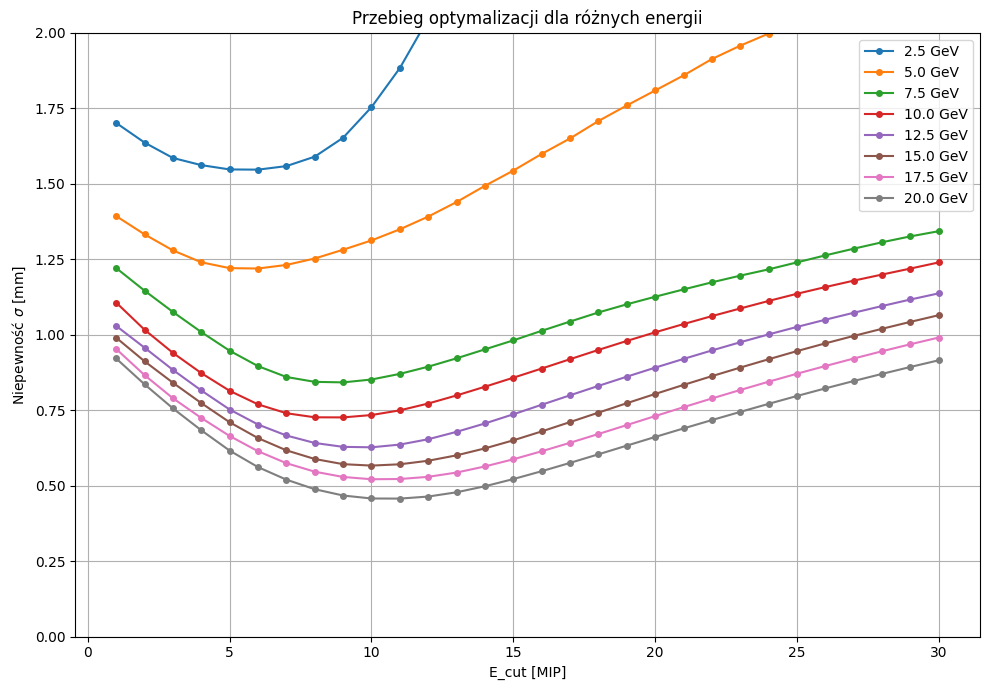

In [1]:
### Wizualizacja wartośći E_cut od niepewności

import numpy as np
import matplotlib.pyplot as plt


energies = [25, 50, 75, 100, 125, 150, 175, 200] # Lista energii wiązki pozytonów w danych. 25 GeV = 2.5 GeV itd.

scan_values = np.arange(1.0, 31.0, 1.0) # Zakres wartości parametru E_cut, który będzie skanowany 

# Transformacja pikseli na mm
Nx = 96
PIXEL_SIZE = 5.625
CENTER_X_IDX = (Nx - 1) / 2.0

Nevt_to_read = 3000  # Liczba zdarzeń do odczytania z pliku

curves_data = {}

print(f"Rozpoczynam analizę")

for energy in energies:
    filename = f"ToyMC/output_0/toymc_{energy}gev_0deg.dat"
    
    all_events = [] #Zbiór danych 
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) #ID, N_dep, ?, N_list
                if len(head) < 4: break
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_x = shift[0] # Prawdziwa pozycja X,Y oraz kąty
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                all_events.append((true_x, idlist, elist)) # Dodajemy zdarzenie do listy 
    except FileNotFoundError:
        print(f"Pominięto, brak pliku {filename}")
        continue

    sigmas_for_energy = []
    cuts_for_energy = []

    for E_curr in scan_values:
        delta_x_list = []
        for true_x, idlist, elist in all_events:
            idx_arr = (idlist % 100000) // 100 # Dekodowanie indeksów X z ID pikseli
            mask = elist > E_curr # Tworzymy maskę pikseli powyżej progu E_cut
            if np.sum(mask) > 0: # Sprawdzamy, czy są piksele powyżej progu
                weights = np.log(elist[mask] / E_curr) # Obliczamy wagi logarytmiczne
                sum_w = np.sum(weights)
                if sum_w > 0:
                    mean_idx = np.sum(idx_arr[mask] * weights) / sum_w # Liczymy średnią ważoną (x_reco)
                    reco_x = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE # Przeliczamy na mm
                    delta_x_list.append(reco_x - true_x) # Liczymy Delta X
        
        if len(delta_x_list) > 50: #
            sigma = np.std(delta_x_list) # Obliczamy sigma dla bieżącego E_cut
            sigmas_for_energy.append(sigma) 
            cuts_for_energy.append(E_curr) #
        else:
            break
    
    # Zapisujemy dane do wykresu
    curves_data[energy] = (cuts_for_energy, sigmas_for_energy)

    if len(sigmas_for_energy) > 0:
        min_sigma = min(sigmas_for_energy)
        best_idx = sigmas_for_energy.index(min_sigma)
        best_ecut = cuts_for_energy[best_idx]
        
        print(f">> Analiza zdarzenia {energy / 10} GeV. Minimum: {best_ecut:.1f} MIP (Sigma: {min_sigma:.4f} mm)")
    else:
        print(f">> Analiza pliku: {energy} GeV. Błąd: Brak danych")


# Rysowanie wykresu
plt.figure(figsize=(10, 7))

for energy in energies:
    if energy in curves_data:
        x, y = curves_data[energy]
        plt.plot(x, y, 'o-', label=f'{energy /10 } GeV', markersize=4)

plt.title("Przebieg optymalizacji dla różnych energii")
plt.xlabel("E_cut [MIP]")
plt.ylabel("Niepewność $\sigma$ [mm]")
plt.legend()
plt.grid(True)
plt.ylim(0, 2.0) 

plt.tight_layout()
plt.show()

### Wnioski wynikające z wizualizacji wartości $E_{cut}$
Przy niskim $E_{cut}$ uwzględniamy w obliczeniach szum elektroniki i bardzo słabe cząstki z dalekich części kaskady (ogony). Zaburza to wynik średniej ważonej, zwiększając rozrzut wyników. Następnie, zwiększając $E_{cut}$, stopniowo odcinamy ten szum, dzięki czemu $\sigma$ maleje. Następnie natrafiamy na obszar wycietego szumu — to tam poszukujemy minimum. W pewnym momencie osiągamy optimum – stan równowagi, w którym szum jest wyeliminowany, a sygnał wciąż zachowany.
Gdy zwiększamy $E_{cut}$ jeszcze bardziej, próg staje się zbyt restrykcyjny. Zaczynamy odrzucać piksele, które niosą ważną informację o położeniu centrum kaskady, co ponownie pogarsza niepewność.

Zauważmy, że dla wszystkich badanych energii minimum znajduje się w przedziale pomiędzy 4 a 15 MIP. W kolejnym kroku zawęzimy zakres poszukiwań i zwiększymy gęstość próbkowania w tym obszarze, aby wyznaczyć $E_{cut}$ z większą precyzją.

Obserwujemy, że im wyższa energia cząstki, tym optymalne $E_{cut}$ przesuwa się w stronę wyższych wartości. Wynika to z faktu, że kaskady o wyższej energii mają gęstsze i bardziej energetyczne centrum, co pozwala na zastosowanie wyższego progu odcięcia bez utraty kluczowych danych, jednocześnie skuteczniej eliminując tło.

Dodatkowo, im wyższa energia, tym niższa jest minimalna $\sigma$. Wynika to ze statystyki kaskady elektromagnetycznej – więcej cząstek wtórnych to lepsze próbkowanie sygnału.

Rozpoczynam kalibrację (zakres 4.0-15.0 MIP, krok 0.1)

>> Analiza zdarzenia 2.5 GeV
ZWYCIĘZCA: 6.5 MIP (Sigma: 1.5445 mm)

>> Analiza zdarzenia 5.0 GeV
ZWYCIĘZCA: 6.5 MIP (Sigma: 1.1505 mm)

>> Analiza zdarzenia 7.5 GeV
ZWYCIĘZCA: 8.5 MIP (Sigma: 0.8643 mm)

>> Analiza zdarzenia 10.0 GeV
ZWYCIĘZCA: 8.6 MIP (Sigma: 0.7256 mm)

>> Analiza zdarzenia 12.5 GeV
ZWYCIĘZCA: 9.5 MIP (Sigma: 0.6248 mm)

>> Analiza zdarzenia 15.0 GeV
ZWYCIĘZCA: 10.0 MIP (Sigma: 0.5681 mm)

>> Analiza zdarzenia 17.5 GeV
ZWYCIĘZCA: 10.3 MIP (Sigma: 0.5111 mm)

>> Analiza zdarzenia 20.0 GeV
ZWYCIĘZCA: 10.7 MIP (Sigma: 0.4678 mm)


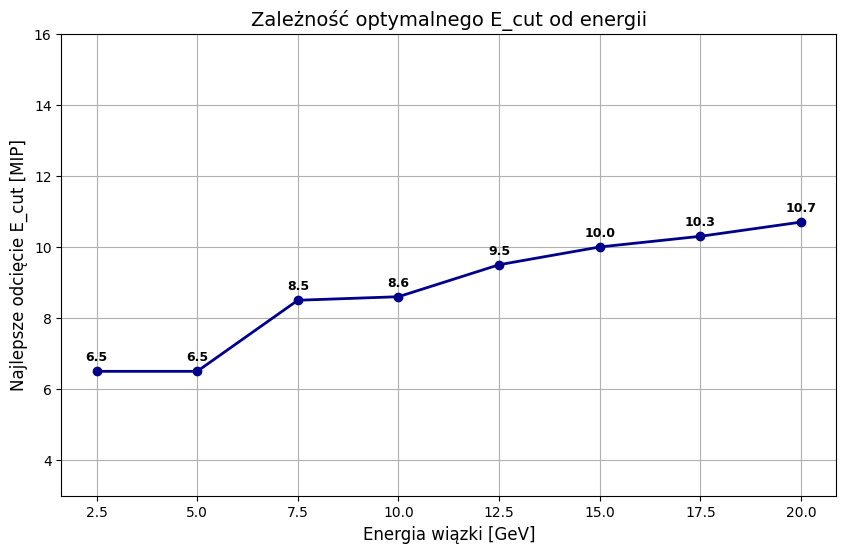


FINALNA TABELA KALIBRACYJNA
Energia [GeV]   | Optymalne E_cut [MIP]     | Sigma [mm]          
-----------------------------------------------------------------
2.5             | 6.5                       | 1.5445              
5.0             | 6.5                       | 1.1505              
7.5             | 8.5                       | 0.8643              
10.0            | 8.6                       | 0.7256              
12.5            | 9.5                       | 0.6248              
15.0            | 10.0                      | 0.5681              
17.5            | 10.3                      | 0.5111              
20.0            | 10.7                      | 0.4678              


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lista energii wiązki pozytonów w danych. 25 GeV = 2.5 GeV itd.
file_energies = [25, 50, 75, 100, 125, 150, 175, 200] 

# Zakres wartości parametru E_cut, który będzie skanowany
# (Tu zawęziliśmy zakres do 4.0-15.0, bo tam spodziewamy się minimum)
scan_values = np.arange(4.0, 15.1, 0.1) 

Nx = 96
PIXEL_SIZE = 5.625
CENTER_X_IDX = (Nx - 1) / 2.0
Nevt_to_read = 5000 # Liczba zdarzeń do odczytania z pliku

final_best_ecuts = []
final_best_sigmas = []

# Lista do przechowywania rzeczywistych energii (w GeV) do wykresu
real_energies_gev = []

print(f"Rozpoczynam kalibrację (zakres 4.0-15.0 MIP, krok 0.1)")

for energy_code in file_energies:
    # Obliczamy rzeczywistą energię dla wyświetlania i wykresów
    real_energy = energy_code / 10.0
    real_energies_gev.append(real_energy)

    filename = f"ToyMC/output_0/toymc_{energy_code}gev_0deg.dat"
    print(f"\n>> Analiza zdarzenia {real_energy:.1f} GeV")
    
    all_events = [] 
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) #ID, N_dep, ?, N_list
                if len(head) < 4: break
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_x = shift[0] # Prawdziwa pozycja X,Y oraz kąty
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                all_events.append((true_x, idlist, elist)) # Dodajemy zdarzenie do listy 
    except FileNotFoundError:
        print(f"POMINIĘTO: {filename}")
        final_best_ecuts.append(None)
        final_best_sigmas.append(None)
        continue

    local_sigmas = []
    local_cuts = [] 

    for E_curr in scan_values:
        delta_x_list = []
        for true_x, idlist, elist in all_events:
            idx_arr = (idlist % 100000) // 100 # Dekodowanie indeksów X z ID pikseli
            mask = elist > E_curr # Tworzymy maskę pikseli powyżej progu E_cut
            if np.sum(mask) > 0: # Sprawdzamy, czy są piksele powyżej progu
                weights = np.log(elist[mask] / E_curr) # Obliczamy wagi logarytmiczne
                sum_w = np.sum(weights)
                if sum_w > 0:
                    mean_idx = np.sum(idx_arr[mask] * weights) / sum_w # Liczymy średnią ważoną (x_reco)
                    reco_x = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE # Przeliczamy na mm
                    delta_x_list.append(reco_x - true_x) # Liczymy Delta X
        
        if len(delta_x_list) > 100:
            sigma = np.std(delta_x_list) # Obliczamy sigma dla bieżącego E_cut
            local_sigmas.append(sigma)
            local_cuts.append(E_curr)

    # Znalezienie minimum dla danej energii
    if len(local_sigmas) > 0:
        min_sigma = min(local_sigmas)
        best_idx = local_sigmas.index(min_sigma)
        best_e = local_cuts[best_idx]
        
        final_best_ecuts.append(best_e)
        final_best_sigmas.append(min_sigma)
        
        print(f"ZWYCIĘZCA: {best_e:.1f} MIP (Sigma: {min_sigma:.4f} mm)")
    else:
        print("BŁĄD: Brak wystarczających danych w zadanym zakresie.")
        final_best_ecuts.append(None)
        final_best_sigmas.append(None)

# Wykres końcowy
plt.figure(figsize=(10, 6))

plt.plot(real_energies_gev, final_best_ecuts, 'o-', color='darkblue', linewidth=2)

plt.title("Zależność optymalnego E_cut od energii", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Najlepsze odcięcie E_cut [MIP]", fontsize=12)
plt.grid(True)

# Opis wartości na wykresie
for x, y in zip(real_energies_gev, final_best_ecuts):
    if y is not None:
        plt.text(x, y + 0.3, f"{y:.1f}", ha='center', fontsize=9, fontweight='bold')

plt.ylim(3, 16) 
plt.show()

# Tabela końcowa
print("\nFINALNA TABELA KALIBRACYJNA")
print(f"{'Energia [GeV]':<15} | {'Optymalne E_cut [MIP]':<25} | {'Sigma [mm]':<20}")
print("-" * 65)

# Iterujemy po rzeczywistych energiach
for e, cut, sig in zip(real_energies_gev, final_best_ecuts, final_best_sigmas):
    if cut is not None:
        print(f"{e:<15.1f} | {cut:<25.1f} | {sig:<20.4f}")

# Podsumowanie Etapu I (Kalibracja pozycji)

Otrzymane wyniki wykazują wyraźną zależność między energią cząstki pierwotnej a optymalnym progiem odcięcia. Im wyższa energia uderzającego pozytonu, tym wyższe cięcie energetyczne należy zastosować, aby precyzyjnie wyznaczyć punkt uderzenia.

| Energia Wiązki [GeV] | Optymalne $E_{cut}$ [MIP] | Niepewność  $\sigma_x$ [mm] |
| :---: | :---: | :---: |
| 2.5 | 6.5 | 1.5445 |
| 5.0 | 6.5 | 1.1505 |
| 7.5 | 8.5 | 0.8643 |
| 10.0 | 8.6 | 0.7256 |
| 12.5 | 9.5 | 0.6248 |
| 15.0 | 10.0 | 0.5681 |
| 17.5 | 10.3 | 0.5111 |
| 20.0 | 10.7 | 0.4678 |

**Wnioski aplikacyjne dla dalszych etapów**

Wyznaczone powyżej wysokie wartości parametrów $E_{cut}$ są optymalne wyłącznie z perspektywy poszukiwania geometrycznego środka uderzenia w płaszczyźnie poprzecznej. Przy próbie wykorzystania tych samych wartości $E_{cut}$ do rekonstrukcji kierunku lotu (Etap II), doprowadziłoby to do znacznego skrócenia widocznej ścieżki (ramienia pomiarowego) i w konsekwencji, do pogorszenia wyników niepewności. Z tego powodu optymalizacja dla kąta wejścia będzie wymagała zastosowania odmiennego podejścia analitycznego, co zostanie pokazane w następnym etapie.



# Etap II: Rekonstrukcja Kątowa 
W Etapie II odchodzimy od założenia prostopadłego padania wiązki. Analizujemy dane, w których pozytony wpadają do detektora pod różnym kątem (dane `output_10` oraz `output_20`). 

Celem jest odtworzenie trajektorii cząstki wewnątrz kalorymetru i na tej podstawie wyznaczenie kąta jej wejścia. Wykorzystujemy fakt, że kaskada elektromagnetyczna rozwija się wzdłuż osi lotu cząstki pierwotnej. 

### Metoda: Śledzenie osi kaskady z użyciem klasteryzacji

Zamiast traktować detektor jako jedną całość (jak w Etapie I), teraz wykorzystamy jego strukturę segmentową. Kalorymetr składa się z 25 warstw.  

Algorytm rekonstrukcji kąta realizowany w kodzie opiera się na następujących krokach: 

1) **Ograniczenie rozmycia bocznego (klasteryzacja)**. W głębszych warstwach detektora kaskada ulega silnemu rozmyciu, a pojedyncze, odległe od osi zdarzenia wprowadzają znaczący szum. Aby temu zapobiec, w każdej warstwie znajdujemy najpierw piksel o najwyższym depozycie energii (rdzeń kaskady), a następnie wyznaczamy pozycję środka ciężkości depozytu energii $x_k$ tylko na podstawie najbliższego sąsiedztwa maksimum (okno o promieniu $\pm 1$ piksel).

2) **Środek ciężkości ze zmniejszonym progiem**. Po zastosowaniu okna, stosujemy metodę logarytmiczną ze znacznie obniżoną stałą wartością progu energetycznego $E_{cut} = 0.5 \text{ MIP}$ (w stosunku do wartości optymalizowanych w Etapie I dla pozycji). Obniżenie $E_{cut}$ pozwala na wydłużenie trajektorii poprzez włączenie do analizy ogona kaskady: $$x_k = \frac{\sum (x_i \cdot \ln(E_i/E_{cut}))}{\sum \ln(E_i/E_{cut})}$$ Otrzymujemy w ten sposób zbiór punktów pomiarowych $(z_k, x_k)$. 

3) **Ważone dopasowanie trajektorii**. Zakładamy, że cząstka porusza się po linii prostej. Jeśli liczba aktywnych warstw wynosi co najmniej 3, dopasowujemy do punktów pomiarowych funkcję liniową metodą najmniejszych kwadratów: $$x(z) = a\cdot z + b$$ Zastosowano wariant ważonego dopasowania (`np.polyfit` z parametrem `w`), gdzie waga każdego punktu to jego wartość $\omega_k$. Dzięki temu warstwy z silnym depozytem bliskim rdzenia mają dominujący wpływ na wynik dopasowania prostej. Parametr $a$ to nachylenie prostej wyrażone w [mm/warstwę].  

4) **Wyznaczenie kąta i niepewności**. Samo nachylenie $a$ z fitu mówi nam, o ile milimetrów przesuwa się cząstka na jedną warstwę. Aby uzyskać kąt w stopniach, uwzględniamy fizyczną odległość między warstwami (grubość absorbera, sensora i przerw montażowych = 4,5 mm): $$ \tan(\theta) = \frac{a}{\text{4,5 mm}}$$ Zrekonstruowany kąt to: $$\theta_{\text{reco}} = \arctan(\frac{a}{4,5})\cdot \frac{180}{\pi}$$ Ostateczna niepewność kątowa $\sigma_\theta$ wyznaczana jest jako odchylenie standardowe różnicy pomiędzy uzyskanym $\theta_{reco}$, a dokładnym kątem.

Rozpoczynam analizę danych z rozmyciem +/-10 stopni

>> Analiza 2.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 5.5661 stopni
Średnia ostatnia warstwa: 18.65 / 24.0

>> Analiza 5.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 3.6972 stopni
Średnia ostatnia warstwa: 20.88 / 24.0

>> Analiza 7.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 2.9212 stopni
Średnia ostatnia warstwa: 21.86 / 24.0

>> Analiza 10.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 2.3907 stopni
Średnia ostatnia warstwa: 22.38 / 24.0

>> Analiza 12.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 2.1842 stopni
Średnia ostatnia warstwa: 22.78 / 24.0

>> Analiza 15.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 1.9243 stopni
Średnia ostatnia warstwa: 23.07 / 24.0

>> Analiza 17.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 1.7546 stopni
Średnia ostatnia warstwa: 23.24 / 24.0

>> Analiza 20.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 1.7104 stopni
Średnia ostatnia warstwa: 23.41 / 24.0

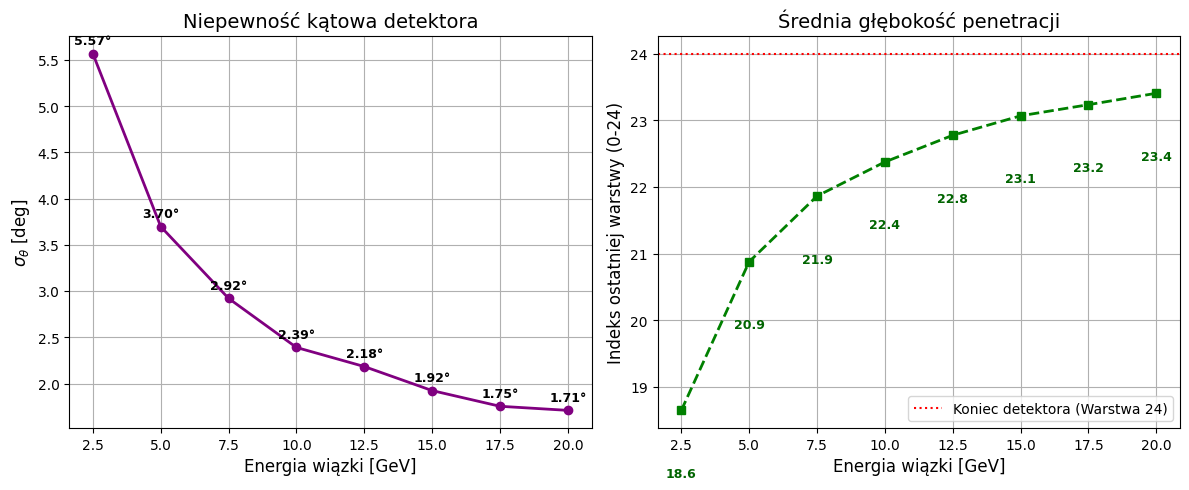


 Wyniki (rozmycie +/-10 stopni) 
Energia [GeV]   | Sigma [deg]     | Śr. Głębokość  
-------------------------------------------------------
2.5             | 5.5661          | 18.65          
5.0             | 3.6972          | 20.88          
7.5             | 2.9212          | 21.86          
10.0            | 2.3907          | 22.38          
12.5            | 2.1842          | 22.78          
15.0            | 1.9243          | 23.07          
17.5            | 1.7546          | 23.24          
20.0            | 1.7104          | 23.41          


In [ ]:
### Analiza dla danych z rozmyciem +/- 10 stopni

import numpy as np
import matplotlib.pyplot as plt
import math

# Dla rekonstrukcji kąta nadpisujemy wartości na obniżony próg (0.5 MIP)
E_cut_val = 0.5
calibration_map = {
    25: E_cut_val, 50: E_cut_val, 75: E_cut_val, 100: E_cut_val,
    125: E_cut_val, 150: E_cut_val, 175: E_cut_val, 200: E_cut_val
}

file_energies = [25, 50, 75, 100, 125, 150, 175, 200]
folder = "ToyMC/output_10"  

Nx = 96                 
NL = 25                 
PIXEL_SIZE = 5.625      
CENTER_X_IDX = (Nx - 1) / 2.0  
LAYER_THICKNESS = 4.5   
Nevt_to_read = 5000     

angle_resolutions = []      # Tu zapiszemy Sigma kątowe
real_energies_gev = []      # Tu zapiszemy energie w GeV 
avg_penetration_depth = []  # Tu zapiszemy średnią głębokość kaskady

print(f"Rozpoczynam analizę danych z rozmyciem +/-10 stopni")

for energy_code in file_energies:
    # Przeliczenie kodu na rzeczywistą energię (np. 25 -> 2.5 GeV)
    real_energy = energy_code / 10.0
    real_energies_gev.append(real_energy)

    filename = f"{folder}/toymc_{energy_code}gev_10deg.dat"
    
    E_cut = calibration_map.get(energy_code, 0.5) 
    
    print(f"\n>> Analiza {real_energy:.1f} GeV (używam E_cut={E_cut} MIP)...")
    
    delta_angle_list = []     # Lista błędów kątowych dla tej energii
    max_layers_per_event = [] # Lista głębokości dla każdego zdarzenia
    
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) # [ID, N_dep, ?, N_list]
                if len(head) < 4: break 
                
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_angle_deg = shift[2] # Kąt X
                
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                
                # Dekodowanie adresów
                idl = idlist // 100000       
                idx = (idlist % 100000) // 100 
                
                layer_z = [] # Oś Z (numer warstwy)
                layer_x = [] # Oś X (wyznaczona pozycja w mm)
                layer_weights = [] # Wagi do ważonego fitu
                
                for layer in range(NL): 
                    mask_layer = (idl == layer) 
                    
                    if np.sum(mask_layer) > 0:
                        e_layer = elist[mask_layer]   # Energie w danej warstwie
                        idx_layer = idx[mask_layer]   # Indeksy X w danej warstwie
                        
                        # Klasteryzacja
                        max_e_index = np.argmax(e_layer)
                        center_idx = idx_layer[max_e_index]
                        
                    
                        window_radius = 1 
                        mask_window = np.abs(idx_layer - center_idx) <= window_radius
                        
                        e_layer = e_layer[mask_window]
                        idx_layer = idx_layer[mask_window]
                        
                        # Filtr E_cut
                        mask_cut = e_layer > E_cut
                        if np.sum(mask_cut) > 0:
                            w = np.log(e_layer[mask_cut] / E_cut) # Wagi logarytmiczne
                            sum_w = np.sum(w)
                            
                            if sum_w > 0:
                                mean_idx = np.sum(idx_layer[mask_cut] * w) / sum_w # Środek ciężkości w tej warstwie
                                reco_x_mm = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE
                                
                                
                                layer_z.append(layer)
                                layer_x.append(reco_x_mm)
                                layer_weights.append(sum_w) # Zapisujemy wagę warstwy 
                
                # Analiza głębokości penetracji
                if len(layer_z) > 0:
                    # Sprawdzamy, jaki był największy numer warstwy z sygnałem
                    last_layer = max(layer_z) 
                    max_layers_per_event.append(last_layer)
                
                # Fitowanie prostej do punktów (layer_z, layer_x)
                if len(layer_z) >= 3:
                    try:
                        params = np.polyfit(layer_z, layer_x, 1, w=layer_weights) 
                    except:
                        params = np.polyfit(layer_z, layer_x, 1) 
                    
                    slope = params[0] 
                    
                    # Obliczamy kąt 
                    reco_angle_rad = math.atan(slope / LAYER_THICKNESS)
                    reco_angle_deg = math.degrees(reco_angle_rad)
                    
                    # Zapisujemy błąd 
                    delta_angle_list.append(reco_angle_deg - true_angle_deg)

    except FileNotFoundError:
        print(f"POMINIĘTO: {filename}")
        angle_resolutions.append(None)
        avg_penetration_depth.append(None)
        continue

    if len(delta_angle_list) > 100:
        sigma_angle = np.std(delta_angle_list) # Odchylenie standardowe błędów kątowych
        angle_resolutions.append(sigma_angle)
        print(f"Niepewność kątowa: {sigma_angle:.4f} stopni")
    else:
        print("BŁĄD: Zbyt mało danych")
        angle_resolutions.append(None)

    # Obliczanie średniej głębokości
    if len(max_layers_per_event) > 0:
        avg_depth = np.mean(max_layers_per_event)
        avg_penetration_depth.append(avg_depth)
        print(f"Średnia ostatnia warstwa: {avg_depth:.2f} / 24.0")
    else:
        avg_penetration_depth.append(None)

# Wizualizacja wyników
plt.figure(figsize=(12, 5))

# Wykres 1: Niepewność kątowa
plt.subplot(1, 2, 1)
plt.plot(real_energies_gev, angle_resolutions, 'o-', color='purple', linewidth=2)
plt.title("Niepewność kątowa detektora", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel(r"$\sigma_{\theta}$ [deg]", fontsize=12)
plt.grid(True)
for x, y in zip(real_energies_gev, angle_resolutions):
    if y is not None:
        plt.text(x, y + 0.1, f"{y:.2f}°", ha='center', fontsize=9, fontweight='bold')

# Wykres 2: Średnia głębokość penetracji
plt.subplot(1, 2, 2)
valid_x = [x for x, d in zip(real_energies_gev, avg_penetration_depth) if d is not None]
valid_y = [d for d in avg_penetration_depth if d is not None]

plt.plot(valid_x, valid_y, 's--', color='green', linewidth=2)
plt.axhline(y=24, color='red', linestyle=':', label='Koniec detektora (Warstwa 24)')
plt.title("Średnia głębokość penetracji", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Indeks ostatniej warstwy (0-24)", fontsize=12)
plt.legend()
plt.grid(True)
for x, y in zip(valid_x, valid_y):
    plt.text(x, y - 1.0, f"{y:.1f}", ha='center', fontsize=9, color='darkgreen', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabela wyników
print("\n Wyniki (rozmycie +/-10 stopni) ")
print(f"{'Energia [GeV]':<15} | {'Sigma [deg]':<15} | {'Śr. Głębokość':<15}")
print("-" * 55)
for e, sig, depth in zip(real_energies_gev, angle_resolutions, avg_penetration_depth):
    s_val = f"{sig:.4f}" if sig is not None else "---"
    d_val = f"{depth:.2f}" if depth is not None else "---"
    print(f"{e:<15.1f} | {s_val:<15} | {d_val:<15}")

# Analiza niepewności kątowej dla danych `output_10`

Poniższa tabela przedstawia wyznaczoną rozdzielczość kątową ($\sigma_\theta$) w funkcji energii wiązki:

| Energia Wiązki [GeV] | Niepewność $\sigma_\theta$ [deg] | Średnia głębokość penetracji [warstwy] |
| :---: | :---: | :---: |
| 2.5 | 5.57 | 18.65 |
| 5.0 | 3.70 | 20.88 |
| 7.5 | 2.92 | 21.86 |
| 10.0 | 2.39 | 22.38 |
| 12.5 | 2.18 | 22.78 |
| 15.0 | 1.92 | 23.07 |
| 17.5 | 1.75 | 23.24 |
| 20.0 | 1.71 | 23.41 |

**Analiza zależności od energii** Obserwujemy znaczącą, ponad 3-krotną poprawę niepewności wraz ze wzrostem energii ($\sigma_\theta$ maleje z $5,57^\circ$ do $1,71^\circ$). Zestawienie tego wyniku ze średnią głębokością penetracji (wzrost analizowanego zasięgu z ~18 do ponad 23 warstw) pozwala wyjaśnić fizyczną naturę tego zjawiska:

1) **Krótsze ramię pomiarowe i mniejsza gęstość przy niskich energiach**. Dla energii 2.5 GeV kaskada wygasa średnio w okolicy 18-19 warstwy. Ze względu na mniejszą liczbę wyprodukowanych cząstek wtórnych, wyznaczone pozycje w poszczególnych warstwach są bardziej podatne na fluktuacje, co przy krótszej linii dopasowania przekłada się na wyższy błąd kątowy.
2) **Maksymalizacja ramienia pomiarowego przy wysokich energiach**. Dla 20 GeV kaskada jest na tyle energetyczna, że jej ogon "ciągnie" się praktycznie do samego końca detektora (średnio dociera do 23,4 warstwy na 25 dostępnych). Dzięki obniżeniu progu $E_{cut}$ algorytm jest w stanie śledzić ten ogon, tworząc bardzo długą "dźwignię" do dopasowania prostej. W połączeniu z uśrednianiem dużej liczby cząstek w rdzeniu kaskady, czyni to fit stabilnym.

**Wnioski w kontekście rozmycia $\pm 10^\circ$**

Dla wiązki o rozkładzie jednorodnym w przedziale $\pm 10^\circ$, samo statystyczne odchylenie standardowe kąta wynosi ok. $5,77^\circ$. 
Dla najniższej energii 2,5 GeV wyznaczona rozdzielczość detektora ($5,57^\circ$) jest zbliżona do tego naturalnego rozmycia. Oznacza to, że przy tak niskich energiach poprawna identyfikacja pierwotnego kierunku pozytonu jest wysoce utrudniona i zdominowana przez naturalne fluktuacje kaskady.

Zupełnie inaczej sytuacja wygląda dla wyższych energii. Już od około 7,5 GeV błąd spada poniżej $3^\circ$, by dla energii 20 GeV osiągnąć zaledwie $1,71^\circ$. Jest to wartość o wiele mniejsza od zakresu zmienności badanej wiązki. Dowodzi to, że po zastosowaniu odpowiednich metod (klasteryzacja, ważony fit i niskie cięcie energetyczne), detektor znakomicie spełnia swoje zadanie w tym przedziale i potrafi precyzyjnie odtworzyć kierunek padania cząstki.



Rozpoczynam analizę danych z rozmyciem +/-20 stopni

>> Analiza 2.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 5.3230 stopni
Średnia ostatnia warstwa: 18.52 / 24.0

>> Analiza 5.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 3.4893 stopni
Średnia ostatnia warstwa: 20.73 / 24.0

>> Analiza 7.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 2.8120 stopni
Średnia ostatnia warstwa: 21.73 / 24.0

>> Analiza 10.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 2.2922 stopni
Średnia ostatnia warstwa: 22.28 / 24.0

>> Analiza 12.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 2.0370 stopni
Średnia ostatnia warstwa: 22.69 / 24.0

>> Analiza 15.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 1.7566 stopni
Średnia ostatnia warstwa: 22.99 / 24.0

>> Analiza 17.5 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 1.6353 stopni
Średnia ostatnia warstwa: 23.16 / 24.0

>> Analiza 20.0 GeV (używam E_cut=0.5 MIP)...
Niepewność kątowa: 1.5593 stopni
Średnia ostatnia warstwa: 23.33 / 24.0

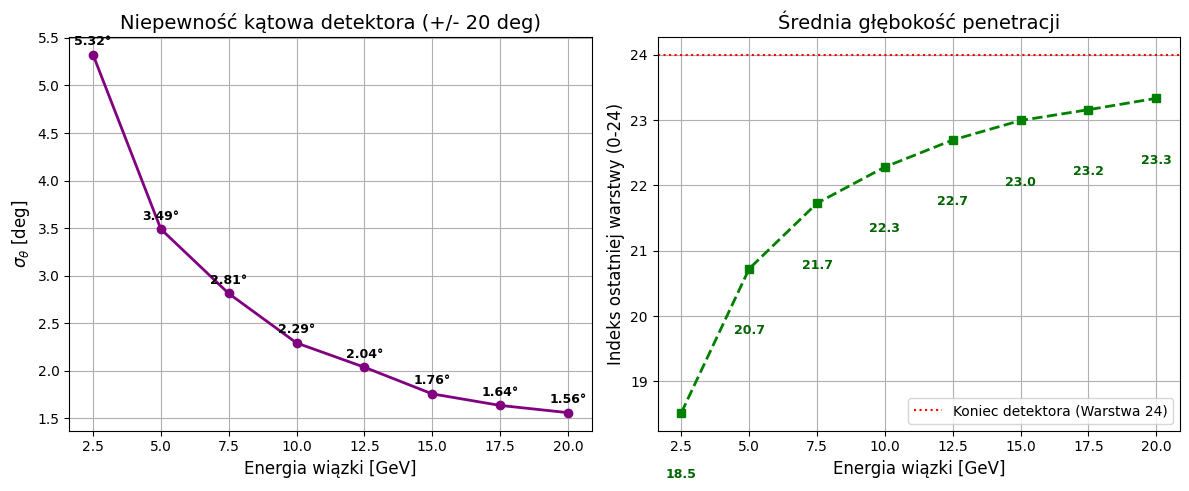


 Wyniki (rozmycie +/-20 stopni) 
Energia [GeV]   | Sigma [deg]     | Śr. Głębokość  
-------------------------------------------------------
2.5             | 5.3230          | 18.52          
5.0             | 3.4893          | 20.73          
7.5             | 2.8120          | 21.73          
10.0            | 2.2922          | 22.28          
12.5            | 2.0370          | 22.69          
15.0            | 1.7566          | 22.99          
17.5            | 1.6353          | 23.16          
20.0            | 1.5593          | 23.33          


In [2]:
### Analiza dla danych z rozmyciem +/- 20 stopni

import numpy as np
import matplotlib.pyplot as plt
import math

# Dla rekonstrukcji kąta nadpisujemy wartości na obniżony próg (0.5 MIP)
E_cut_val = 0.5
calibration_map = {
    25: E_cut_val, 50: E_cut_val, 75: E_cut_val, 100: E_cut_val,
    125: E_cut_val, 150: E_cut_val, 175: E_cut_val, 200: E_cut_val
}

file_energies = [25, 50, 75, 100, 125, 150, 175, 200]
folder = "ToyMC/output_20"  

Nx = 96                 
NL = 25                 
PIXEL_SIZE = 5.625      
CENTER_X_IDX = (Nx - 1) / 2.0  
LAYER_THICKNESS = 4.5   
Nevt_to_read = 5000     

angle_resolutions = []      # Tu zapiszemy Sigma kątowe
real_energies_gev = []      # Tu zapiszemy energie w GeV 
avg_penetration_depth = []  # Tu zapiszemy średnią głębokość kaskady

print(f"Rozpoczynam analizę danych z rozmyciem +/-20 stopni")

for energy_code in file_energies:
    # Przeliczenie kodu na rzeczywistą energię (np. 25 -> 2.5 GeV)
    real_energy = energy_code / 10.0
    real_energies_gev.append(real_energy)

    filename = f"{folder}/toymc_{energy_code}gev_20deg.dat"
    
    E_cut = calibration_map.get(energy_code, 0.5) 
    
    print(f"\n>> Analiza {real_energy:.1f} GeV (używam E_cut={E_cut} MIP)...")
    
    delta_angle_list = []     # Lista błędów kątowych dla tej energii
    max_layers_per_event = [] # Lista głębokości dla każdego zdarzenia
    
    try:
        with open(filename, 'rb') as infile:
            for _ in range(Nevt_to_read):
                head = np.fromfile(infile, dtype=np.int64, count=4) # [ID, N_dep, ?, N_list]
                if len(head) < 4: break 
                
                shift = np.fromfile(infile, dtype=np.float64, count=4) # [True_X, True_Y, True_AngleX, True_AngleY]
                true_angle_deg = shift[2] # Tutaj interesuje nas Kąt X (trzecia liczba, podana bezpośrednio w stopniach)
                
                Nlist = head[3] # Liczba zapalonych pikseli
                if Nlist < 0: break 
                
                idlist = np.fromfile(infile, dtype=np.int64, count=Nlist) # ID zapalonych pikseli
                elist = np.fromfile(infile, dtype=np.float64, count=Nlist) # Energia w zapalonych pikselach
                
                # Dekodowanie adresów
                idl = idlist // 100000       
                idx = (idlist % 100000) // 100 
                
                layer_z = [] # Oś Z (numer warstwy)
                layer_x = [] # Oś X (wyznaczona pozycja w mm)
                layer_weights = [] # Wagi do ważonego fitu
                
                for layer in range(NL): 
                    mask_layer = (idl == layer) 
                    
                    if np.sum(mask_layer) > 0:
                        e_layer = elist[mask_layer]   # Energie w danej warstwie
                        idx_layer = idx[mask_layer]   # Indeksy X w danej warstwie
                        
                        max_e_index = np.argmax(e_layer)
                        center_idx = idx_layer[max_e_index]
                        
                        # Definiujemy szerokość okna i ograniczamy zbiór pikseli do tego okna
                        window_radius = 1 
                        mask_window = np.abs(idx_layer - center_idx) <= window_radius
                        
                        e_layer = e_layer[mask_window]
                        idx_layer = idx_layer[mask_window]
                        
                        # Filtr E_cut
                        mask_cut = e_layer > E_cut
                        if np.sum(mask_cut) > 0:
                            w = np.log(e_layer[mask_cut] / E_cut) # Wagi logarytmiczne
                            sum_w = np.sum(w)
                            
                            if sum_w > 0:
                                mean_idx = np.sum(idx_layer[mask_cut] * w) / sum_w # Środek ciężkości w tej warstwie
                                reco_x_mm = (mean_idx - CENTER_X_IDX) * PIXEL_SIZE
                                
                                
                                layer_z.append(layer)
                                layer_x.append(reco_x_mm)
                                layer_weights.append(sum_w) # Zapisujemy wagę warstwy 
                
                # Analiza głębokości penetracji
                if len(layer_z) > 0:
                    # Sprawdzamy, jaki był największy numer warstwy z sygnałem
                    last_layer = max(layer_z) 
                    max_layers_per_event.append(last_layer)
                
                # Fitowanie prostej do punktów (layer_z, layer_x)
                if len(layer_z) >= 3:
                    try:
                        params = np.polyfit(layer_z, layer_x, 1, w=layer_weights) 
                    except:
                        params = np.polyfit(layer_z, layer_x, 1) 
                    
                    slope = params[0] 
                    
                    # Obliczamy kąt 
                    reco_angle_rad = math.atan(slope / LAYER_THICKNESS)
                    reco_angle_deg = math.degrees(reco_angle_rad)
                    
                    # Zapisujemy błąd 
                    delta_angle_list.append(reco_angle_deg - true_angle_deg)

    except FileNotFoundError:
        print(f"POMINIĘTO: {filename}")
        angle_resolutions.append(None)
        avg_penetration_depth.append(None)
        continue

    if len(delta_angle_list) > 100:
        sigma_angle = np.std(delta_angle_list) # Odchylenie standardowe błędów kątowych
        angle_resolutions.append(sigma_angle)
        print(f"Niepewność kątowa: {sigma_angle:.4f} stopni")
    else:
        print("BŁĄD: Zbyt mało danych")
        angle_resolutions.append(None)

    # Obliczanie średniej głębokości
    if len(max_layers_per_event) > 0:
        avg_depth = np.mean(max_layers_per_event)
        avg_penetration_depth.append(avg_depth)
        print(f"Średnia ostatnia warstwa: {avg_depth:.2f} / 24.0")
    else:
        avg_penetration_depth.append(None)

# Wizualizacja wyników
plt.figure(figsize=(12, 5))

# Wykres 1: Niepewność kątowa
plt.subplot(1, 2, 1)
plt.plot(real_energies_gev, angle_resolutions, 'o-', color='purple', linewidth=2)
plt.title("Niepewność kątowa detektora (+/- 20 deg)", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel(r"$\sigma_{\theta}$ [deg]", fontsize=12)
plt.grid(True)
for x, y in zip(real_energies_gev, angle_resolutions):
    if y is not None:
        plt.text(x, y + 0.1, f"{y:.2f}°", ha='center', fontsize=9, fontweight='bold')

# Wykres 2: Średnia głębokość penetracji
plt.subplot(1, 2, 2)
valid_x = [x for x, d in zip(real_energies_gev, avg_penetration_depth) if d is not None]
valid_y = [d for d in avg_penetration_depth if d is not None]

plt.plot(valid_x, valid_y, 's--', color='green', linewidth=2)
plt.axhline(y=24, color='red', linestyle=':', label='Koniec detektora (Warstwa 24)')
plt.title("Średnia głębokość penetracji", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Indeks ostatniej warstwy (0-24)", fontsize=12)
plt.legend()
plt.grid(True)
for x, y in zip(valid_x, valid_y):
    plt.text(x, y - 1.0, f"{y:.1f}", ha='center', fontsize=9, color='darkgreen', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabela wyników
print("\n Wyniki (rozmycie +/-20 stopni) ")
print(f"{'Energia [GeV]':<15} | {'Sigma [deg]':<15} | {'Śr. Głębokość':<15}")
print("-" * 55)
for e, sig, depth in zip(real_energies_gev, angle_resolutions, avg_penetration_depth):
    s_val = f"{sig:.4f}" if sig is not None else "---"
    d_val = f"{depth:.2f}" if depth is not None else "---"
    print(f"{e:<15.1f} | {s_val:<15} | {d_val:<15}")

# Analiza niepewności kątowej dla danych `output_20`

Poniższa tabela przedstawia wyniki rekonstrukcji po zastosowaniu zoptymalizowanego algorytmu (obniżone $E_{cut} = 0.5$ MIP, klasteryzacja oraz ważony fit) dla wiązki o szerokim rozmyciu kątowym:

| Energia Wiązki [GeV] | Niepewność $\sigma_\theta$ [deg] | Średnia głębokość penetracji [warstwy] |
| :---: | :---: | :---: |
| 2.5 | 5.32 | 18.52 |
| 5.0 | 3.49 | 20.73 |
| 7.5 | 2.81 | 21.73 |
| 10.0 | 2.29 | 22.28 |
| 12.5 | 2.04 | 22.69 |
| 15.0 | 1.76 | 22.99 |
| 17.5 | 1.64 | 23.16 |
| 20.0 | 1.56 | 23.33 |

**Analiza zależności od energii i głębokości** Podobnie jak w przypadku węższej wiązki, obserwujemy drastyczną poprawę jakości rekonstrukcji wraz ze wzrostem energii. Wartość błędu spada z $5,32^\circ$ (dla 2.5 GeV) do zaledwie $1,56^\circ$ (dla 20 GeV). 

Mechanizm fizyczny pozostaje ten sam: 
1) **Dla 2.5 GeV**: kaskada wygasa średnio na 18-19 warstwie. Krótsze ramię pomiarowe i mniejsza gęstość cząstek wtórnych sprawiają, że dopasowanie prostej jest bardziej wrażliwe na fluktuacje, co skutkuje błędem powyżej $5^\circ$. 
2) **Dla 20 GeV**: średnia penetracja sięga ponad 23 warstw (prawie do samego końca kalorymetru). Bardzo długa "dźwignia" pomiarowa pozwala na niezwykle precyzyjne zdefiniowanie kierunku, sprowadzając błąd w okolice $1,5^\circ$.
3) Zestawienie tych danych udowadnia, że niezależnie od kąta padania (nawet przy znacznych wychyleniach rzędu $20^\circ$), kalorymetr jest wystarczająco szeroki i głęboki.


**Wnioski w kontekście rozmycia $\pm 20^\circ$** Sytuacja wygląda tu niezwykle korzystnie ze względu na bardzo szeroki zakres naturalnego rozmycia wiązki (rozkład płaski w przedziale $40^\circ$, którego odchylenie standardowe wynosi ok. $11,5^\circ$):
1) **Dla 2.5 GeV**: błąd pomiaru wynosi $5,32^\circ$. Jest to wartość ponad dwukrotnie mniejsza od naturalnego rozmycia statystycznego wiązki ($11,5^\circ$). Oznacza to, że nawet dla najniższych badanych energii detektor bardzo dobrze radzi sobie z identyfikacją kierunku padania.
2) **Dla > 10 GeV**: błąd spada do poziomu $1,5^\circ - 2,3^\circ$. W zestawieniu z całkowitą rozpiętością wiązki ($40^\circ$), kalorymetr wykazuje świetną precyzję.



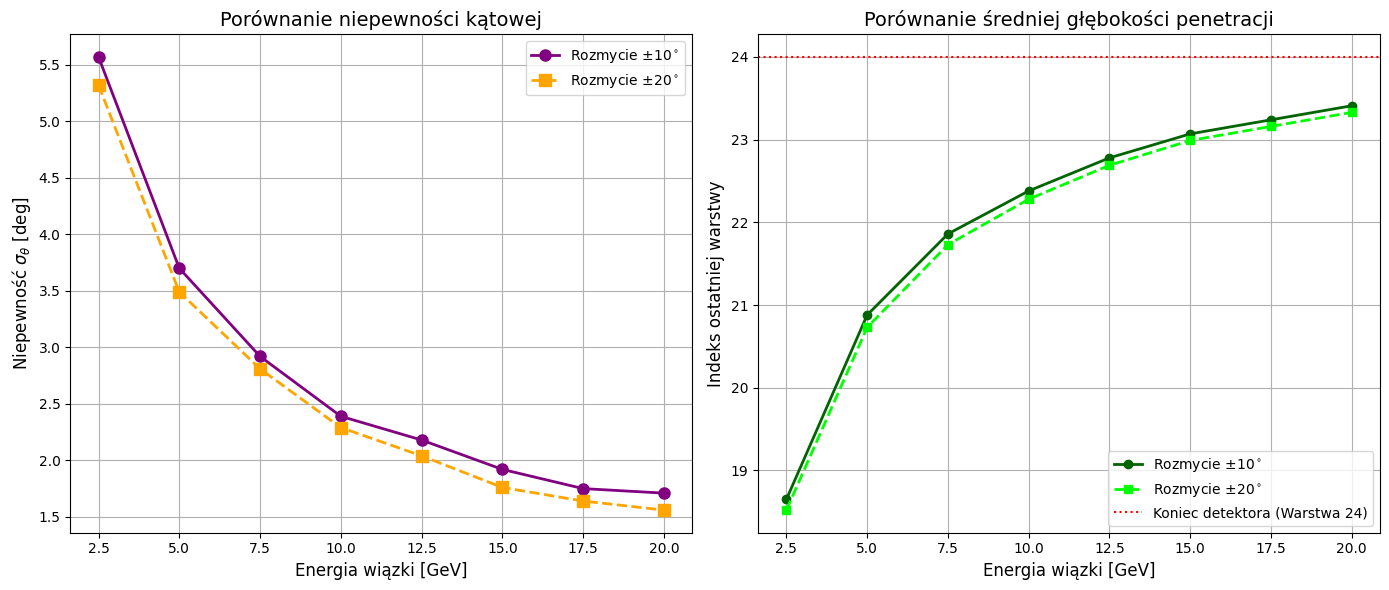

In [3]:
# Porównanie wyników dla rozmycia +/-10 i +/-20 stopni

energies_gev = [2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0]

sigma_10 = [5.57, 3.70, 2.92, 2.39, 2.18, 1.92, 1.75, 1.71]
depth_10 = [18.65, 20.88, 21.86, 22.38, 22.78, 23.07, 23.24, 23.41]

sigma_20 = [5.32, 3.49, 2.81, 2.29, 2.04, 1.76, 1.64, 1.56]
depth_20 = [18.52, 20.73, 21.73, 22.28, 22.69, 22.99, 23.16, 23.33]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(energies_gev, sigma_10, 'o-', color='purple', label=r'Rozmycie $\pm 10^\circ$', linewidth=2, markersize=8)
plt.plot(energies_gev, sigma_20, 's--', color='orange', label=r'Rozmycie $\pm 20^\circ$', linewidth=2, markersize=8)

plt.title("Porównanie niepewności kątowej", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel(r"Niepewność $\sigma_{\theta}$ [deg]", fontsize=12)
plt.legend()
plt.grid(True)



# Wykres 2: Porównanie Głębokości
plt.subplot(1, 2, 2)
plt.plot(energies_gev, depth_10, 'o-', color='darkgreen', label=r'Rozmycie $\pm 10^\circ$', linewidth=2)
plt.plot(energies_gev, depth_20, 's--', color='lime', label=r'Rozmycie $\pm 20^\circ$', linewidth=2)
plt.axhline(y=24, color='red', linestyle=':', label='Koniec detektora (Warstwa 24)')

plt.title("Porównanie średniej głębokości penetracji", fontsize=14)
plt.xlabel("Energia wiązki [GeV]", fontsize=12)
plt.ylabel("Indeks ostatniej warstwy", fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

